<a href="https://colab.research.google.com/github/gpasky/MAT-421/blob/main/ModB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriel Pascual

**17.4: Lagrange Polynomial Interpolation**

A polynomial that goes through all points within a data set is called a Lagrange polynomial


*   Lagrange Polynomial Interpolation property: $L(x_i) = y_i$

*   Lagrange basis polynomials: $P_i(x) = ∏_{j=1,j\not_=i}^n \frac{x-x_j}{x_i-x_j}$ and $L(x)=\sum_{i=1}^ny_iP_i(x)$

We can create a visualization of the Lagrange basis polynomials for the x and y datasets:

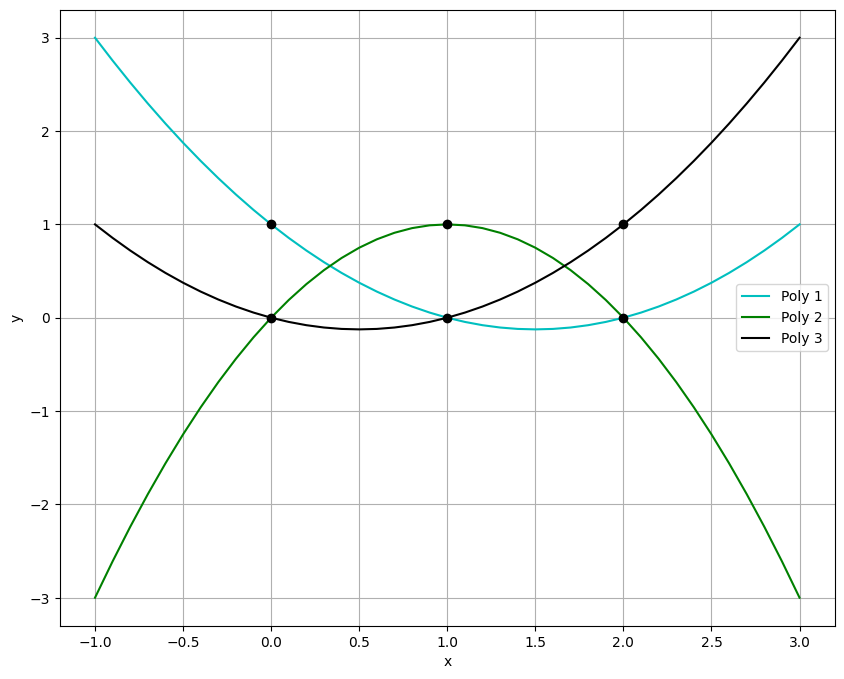

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Data Points
x = [0,1,2]
y = [1,3,2]

# Find Lagrange basis polynomials
coeff1 = [1,-1.5,0.5]
coeff2 = [0,2,-1]
coeff3 = [0,-0.5,0.5]

Poly1 = poly.Polynomial(coeff1)
Poly2 = poly.Polynomial(coeff2)
Poly3 = poly.Polynomial(coeff3)

x_new = np.arange(-1.0,3.1,0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, Poly1(x_new), 'c',label='Poly 1')
plt.plot(x_new, Poly2(x_new), 'g',label='Poly 2')
plt.plot(x_new, Poly3(x_new), 'k',label='Poly 3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


Based on the coefficients of the Lagrange Polynomial, we can verify that this polynomial goes through each data point.

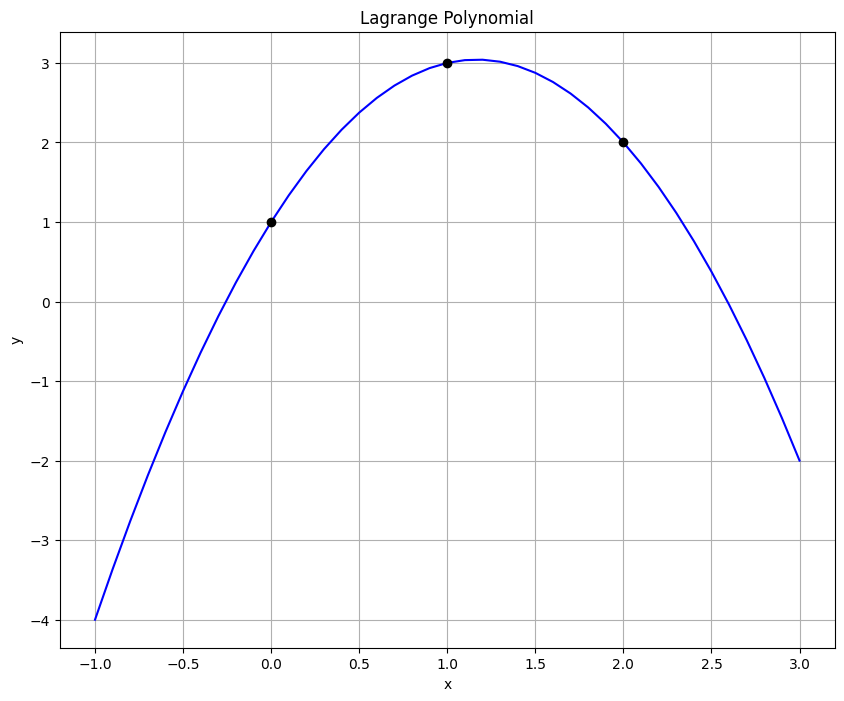

In [8]:
# Lagrange Polynomial
L = Poly1 + 3*Poly2 + 2*Poly3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new),'b',x,y,'ko')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This can also be shown using the lagrange function:

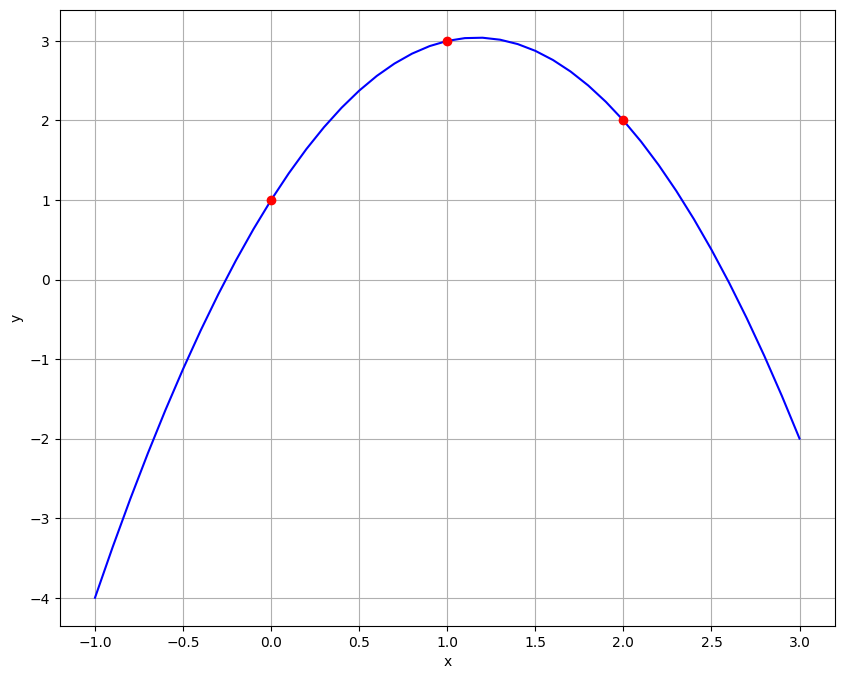

In [3]:
from scipy.interpolate import lagrange
f = lagrange(x,y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can interpolate new data and observe how the polynomial runs through the given data points.

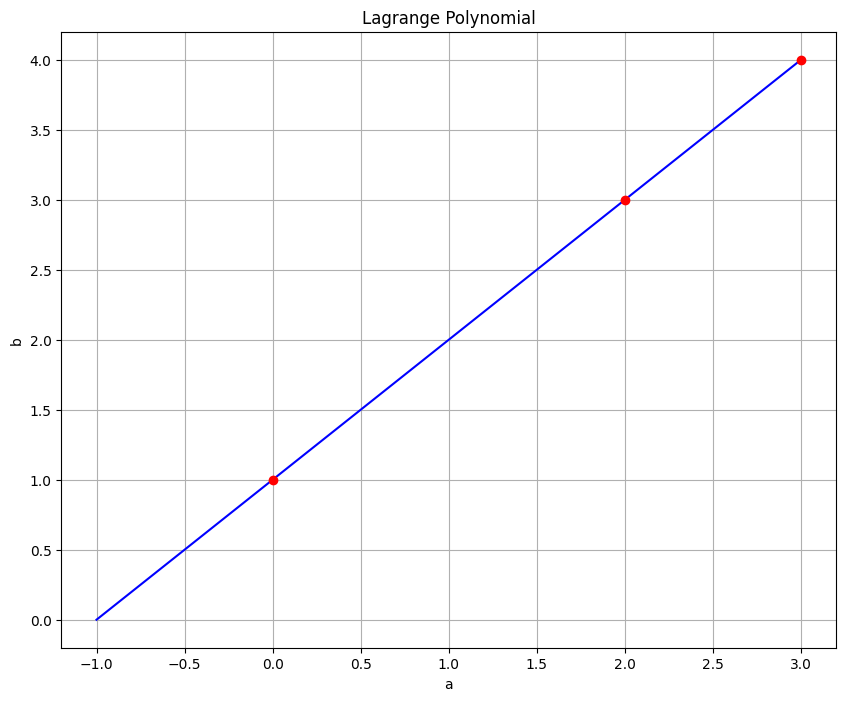

In [13]:
a = [0,2,3]
b = [1,3,4]

from scipy.interpolate import lagrange
f = lagrange(a,b)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', a, b, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('a')
plt.ylabel('b')
plt.show()

**17.5 Newton's Polynomial Interpolation**

Similar to the Lagrange Polynomial Interpolation, the Newton's Polynomial Interpolation another technique used to fit through a set of data points. This interpolation method also uses $f(x_i) = y_i$ to run through each point.

Newton's Polynomial Interpolation Form:

*   $f(x) = ∑_{i=0}^n a_in_i(x)$ where $n_i(x)=∏_{j=0}^{i-1}(x-x_j)$

The divided differences table is used to calculate the coefficients for Newton's Polynomial Interpolation.

Iteration Equation:

$f[x_k,x_{k-1},...,x_1,x_0]$=$\frac{f[x_k,x_{k-1},...,x_2,x_2]-f[x_k,x_{k-1},...,x_1,x_0]}{x_k-x_0}$

An example can be made to show the divided differences table for x = [-4,-2,0,3] and y = [-1,4,1,5]

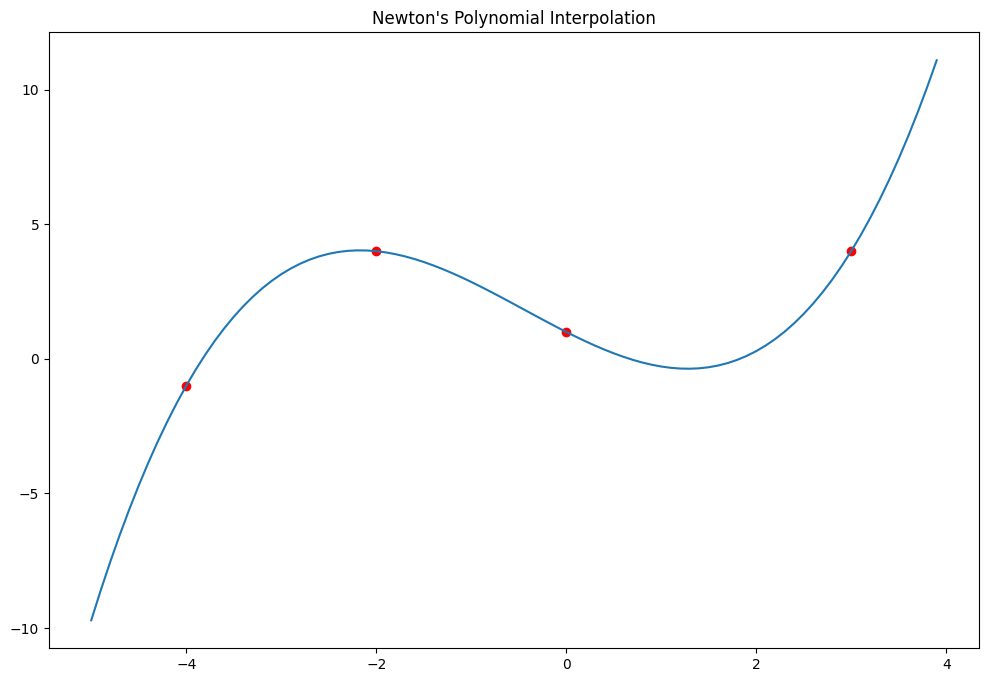

In [17]:
def divided_diff(x,y):

  n = len(y)
  coef = np.zeros([n,n])

  #first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  return coef

def newton_poly(coef, x_data, x):

  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
      p = coef[n-k] + (x - x_data[n-k])*p
  return p


x = np.array([-4,-2,0,3])
y = np.array([-1,4,1,4])

a_s = divided_diff(x,y)[0,:]

x_new = np.arange(-5,4,0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x,y,'ro')
plt.title("Newton's Polynomial Interpolation")
plt.plot(x_new,y_new)